# Принятие решений в бизнесе на основе данных

В крупном интернет-магазине совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы и проанализировать результаты проведенного A/B-теста. 

**Цель исследования** - определить приоритетную гипотезу для проведения А/В - теста и проанализировать результаты проведенного А/В - теста. 

**Ход исследования:**

Данные для исследования мы получили из файлов  hypothesis.csv, orders.csv, visitors.csv.  О качестве данных ничего не известно. Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных.

2. Предобработка данных.

3. Исследовательский анализ данных.

4. Приоритизация гипотез.

5. Статистический анализ данных.

**Задачи исследования:**

1. Изучить общую информацию о данных, выполнить их предобработку.
2. Проверить данные на пропуски, на ошибки и оценить их влияние на исследование.
3. Провести исследовательский анализ данных.
4. Применить фреймворки ICE и RICE для приоретизации выдвинутых гипотез по увеличению выручки.
5. Проанализировать данные проведенного А/В-теста. 
6. Определить есть ли статистически значимые различия между 2 группами А/В теста, которые повлиять на выручку.


## Общая информация о данных

Импортируем библиотеку pandas,scipy.stats, matplotlib, numpy, datetime. Загрузим данные о гипотезах, заказах и посетителях из CSV-файлов в переменные. 

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt  
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")


Считаем данные из csv-файлов в датафреймы и сохраним их.

In [2]:
# загружаем данные
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')  # в переменную hypothesis сохраним данные о гипотезах из csv-файла
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
try:
    orders = pd.read_csv('/datasets/orders.csv')  # в переменную orders сохраним данные о заказах из csv-файл
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
try:
    visitors = pd.read_csv('/datasets/visitors.csv')  # в переменную visitors сохраним данные о посетителях из csv-файла
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

    

Откроем файлы с данными и изучим общую информацию.

In [3]:
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)  
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Получим общую информацию о таблицах c помощью метода info().

In [6]:
hypothesis.info()  # применим метод hypothesis к датафрейму hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 5 столбцов, 9 строк. В столбцах разные типы данных: int64  и object. Пропущенных значений нет.

Согласно документации к данным hypothesis содержит:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


In [7]:
orders.info()  # применим метод info к датафрейму orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 5 столбцов, 1197 строк. В столбцах разные типы данных: int64  и object. Пропущенных значений нет.

Согласно документации к данным hypothesis содержит:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [8]:
visitors.info()  # применим метод info к датафрейму visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 3 столбца, 62 строки. В столбцах разные типы данных: int64  и object. Пропущенных значений нет.

Согласно документации к данным hypothesis содержит:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Вывод:**

Предварительно можно утверждать, что данных достаточно для анализа. Пропусков в данных нет, дату стоит привести к типу datetime, чтобы можно было производить нужные действия с ней, в названиях колонок — расхождения с хорошим стилем. 
Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Предобработка данных

**Стиль заголовков**

Выведем на экран названия столбцов:

In [9]:
display(hypothesis.columns)  # перечень названий столбцов таблицы visits
display(orders.columns)  # перечень названий столбцов таблицы orders
display(visitors.columns)  # перечень названий столбцов таблицы costs

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Index(['date', 'group', 'visitors'], dtype='object')

Приведем названия в соответствие с хорошим стилем:

In [10]:
# переименование столбцов
hypothesis.columns = hypothesis.columns.str.lower()   
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})  

**Дубликаты**

Посчитаем явные дубликаты:

In [11]:
# подсчёт явных дубликатов
display(f'Количество явных дубликатов в hypothesis: {hypothesis.duplicated().sum()}')
display(f'Количество явных дубликатов в orders: {orders.duplicated().sum()}')  
display(f'Количество явных дубликатов в visitors: {visitors.duplicated().sum()}')  

'Количество явных дубликатов в hypothesis: 0'

'Количество явных дубликатов в orders: 0'

'Количество явных дубликатов в visitors: 0'

Явных дубликатов нет.

**Типы данных**

Данные, хранящиеся в датафрейме  отражают природу чисел, однако приведем стобцы с датой к типу datetime, чтобы в дальнейшем производить с датой операции.

In [12]:
# изменяю тип данных в столбцах

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])


**Неявные дубликаты**

С помощью цикла посмотрим уникальные значения в каждой таблице:

In [13]:
# уникальные значения hypothesis
hyp = hypothesis.copy() 
list_c = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
for col_l in list_c:
  print('-'* 25)
  print(col_l, hyp[col_l].sort_values().unique())

-------------------------
hypothesis ['Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов'
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
 'Запустить акцию, дающую скидку на товар в день рождения'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию']
-------------------------
reach [ 1  2  3  5  8 10]
-------------------------
impact [ 1  2  3  5  7  9 10]
---------------------

Неявных дубликатов не найдено, гипотезы уникальные, значения столбцов в пределах 10-балльной шкалы.

In [14]:
# уникальные значения orders
ord = orders.copy() 
list_c = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
for col_l in list_c:
  print('-'* 25)
  print(col_l, ord[col_l].sort_values().unique())

-------------------------
transaction_id [   1062393    4919758    7210578 ... 4281129020 4288552432 4293855558]
-------------------------
visitor_id [   5114589    6958315    8300375 ... 4279090005 4281247801 4283872382]
-------------------------
date ['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-18T00:00:00.000000000'
 '2019-08-19T00:00:00.000000000' '2019-08-20T00:00:00.000000000'
 '2019-08-21T00:00:00.000000000' '2019-08-22T00:00:00.000000000'
 '2019-08-23T00:00:00.000000000'

В таблице `orders` посетители поделены на 2 группы: А и В. 
Дата проведения теста с 1 августа по 31 августа 2019 г. Пропущенных значений нет, каких-то аномальных значений не видно. Минимальная выручка в группе за день - 50 у.е. Максимальная - 1 294 500 у.е.

In [15]:
# уникальные значения visits
vis = visitors.copy() 
list_c = ['date', 'group', 'visitors']
print(vis.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, vis[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',vis[col_l].isna().sum(),
        ', процент NaN', round(vis[col_l].isna().sum()/len(vis)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
-------------------------
date ['2019-08-01T00:00:00.000000000' '2019-08-02T00:00:00.000000000'
 '2019-08-03T00:00:00.000000000' '2019-08-04T00:00:00.000000000'
 '2019-08-05T00:00:00.000000000' '2019-08-06T00:00:00.000000000'
 '2019-08-07T00:00:00.000000000' '2019-08-08T00:00:00.000000000'
 '2019-08-09T00:00:00.000000000' '2019-08-10T00:00:00.000000000'
 '2019-08-11T00:00:00.000000000' '2019-08-12T00:00:00.000000000'
 '2019-08-13T00:00:00.000000000' '2019-08-14T00:00:00.000000000'
 '2019-08-15T00:00:00.000000000' '2019-08-16T00:00:00.000000000'
 '2019-08-17T00:00:00.000000000' '2019-08-1

В таблице `visitors` посетители поделены на 2 группы: А и В. 
Дата проведения теста с 1 августа по 31 августа 2019 г. Пропущенных значений нет, каких-то аномальных значений не видно.

**Основная статистическая информация о датафреймах**

С помощью метода describe() посмотрим основную статистическую информацию количественных показателей в таблицах.Метод отражает основные статистические характеристики для каждого столбца. Нам полезно посмотреть разброс значений по  столбцам. 

In [16]:
pd.options.display.float_format = '{:,.2f}'.format
orders.describe()

,transaction_id,visitor_id,revenue
count,"1,197.00","1,197.00","1,197.00"
mean,"2,155,621,385.53","2,165,960,143.10","8,348.01"
std,"1,229,084,904.76","1,236,014,192.15","39,191.13"
min,"1,062,393.00","5,114,589.00",50.00
25%,"1,166,775,572.00","1,111,826,046.00","1,220.00"
50%,"2,145,193,898.00","2,217,984,702.00","2,978.00"
75%,"3,237,740,112.00","3,177,606,451.00","8,290.00"
max,"4,293,855,558.00","4,283,872,382.00","1,294,500.00"


По статистическим показателям видно, что в столбце `revenue` большой разброс значений. Среднее значительно больше медианы, есть выбросы. Минимальная выручка - 50 у.е. Максимальная - 1 294 500 у.е. Предлагаю построить гистограмму, чтобы нглядно оценить разброс данных.


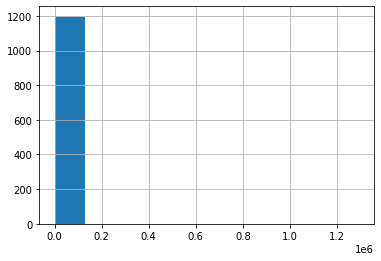

<AxesSubplot:>

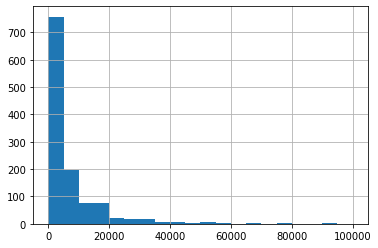

<AxesSubplot:>

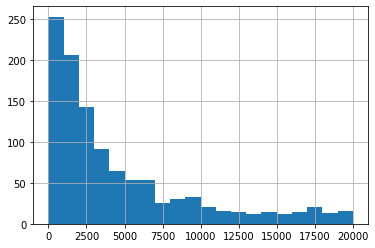

<AxesSubplot:>

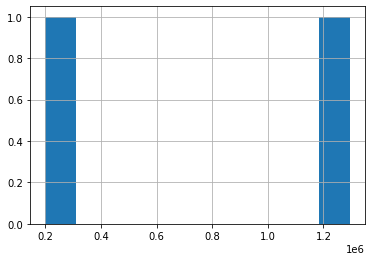

<AxesSubplot:>

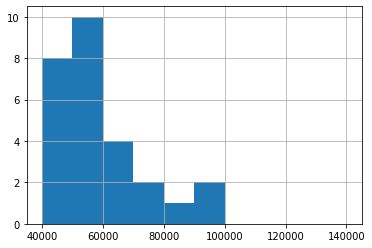

In [17]:
orders['revenue'].hist()
plt.show()
display(orders['revenue'].hist(range=(0,100000),bins=20))
plt.show()
display(orders['revenue'].hist(range=(0,20000),bins=20))
plt.show()
display(orders['revenue'].hist(range=(200000,1294500)))
plt.show()
display(orders['revenue'].hist(range=(40000,140000),bins=10))
plt.show()

In [18]:
ord = orders.query('revenue > 150000')
ord

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

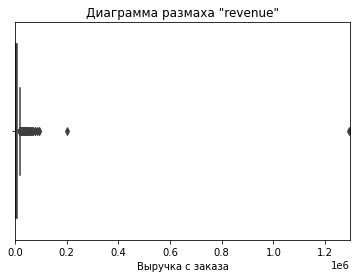

count       1,197.00
mean        8,348.01
std        39,191.13
min            50.00
25%         1,220.00
50%         2,978.00
75%         8,290.00
max     1,294,500.00
Name: revenue, dtype: float64

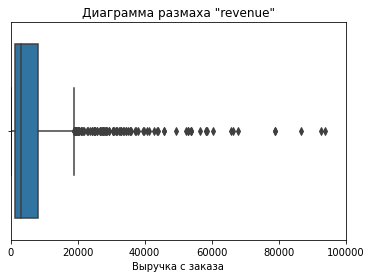

In [19]:
display(orders['revenue'].describe())
sns.boxplot(orders['revenue'])  # построим boxplot для визуализации данных с диапозоном от 0 до 42 млн 
plt.title('Диаграмма размаха "revenue"')
plt.xlabel('Выручка с заказа')
_ = plt.xlim(0, 1296000)
plt.show()
display(orders['revenue'].describe())
sns.boxplot(orders['revenue'])  # построим boxplot для визуализации данных с диапозоном от 0 до 42 млн 
plt.title('Диаграмма размаха "revenue"')
plt.xlabel('Выручка с заказа')
_ = plt.xlim(0,100000)
plt.show()


Чаще всего выручка с заказа до 3000 у.е. Бывают крупные заказы до 100 000 у.е. Есть заказ на 202 740 и 1 294 500 у.е. Причем оба заказа сделаны группой В. Такие выбросы могут повлиять на наше исследование.

**Вывод:** 
На этапе преобработки мы изучили общую информацию из датасетов. Пропуски в столбцах отсутствовали, дубликатов не найдено. Преобразовали типы данных в столбцах, где значения не соответствовали природе данных. Изучили разброс значений в столбцах датасета. Можно говорить о том, что данные пригодны для анализа и их достаточно. 

##  Приоритизация гипотез

В файле `/datasets/hypothesis.csv` представлены 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


### ICE скоринг

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [20]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


8 гипотеза наиболее перспективна по ICE. Затем идут гипотезы 0, 7, 6, 2.

### RICE скоринг

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [21]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Самой перспективной по фреймворку RICE является 7 гипотеза. Следом по приоритету идут гипотезы 2, 0, 6. 

**Вывод:**
При приоритизации гипотез фреймворком RICE 7 гипотеза стала самой перспективной. RICE учитывает такой показатель как `Reach` — скольких пользователей затронет изменение, которое мы хотим внести. А у 7 гипотезы как раз охват пользователей оценен в 10 баллов, то есть изменение затронет всех пользоваталей.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Сначала проверим, есть ли пользователей, которые попали одновременно в группу А и В. 

In [22]:
# Проверим, сколько пользователей попали одновременно в обе группы:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [23]:
# Создадим список пользователей с уникальными visitor_id:
users_АВ = orders.groupby('visitor_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()
users_АВ


array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

58 пользователей попали в группу А и В одновременно, мы не знаем какие факторы повлияли на их поведение на сайте, поэтому исключим их из анализа.

In [24]:
visitors
data=visitors.groupby(['date', 'group']).agg({'visitors': ['sum']}).reset_index(drop=False)
data.columns = data.columns.droplevel(1)
data

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


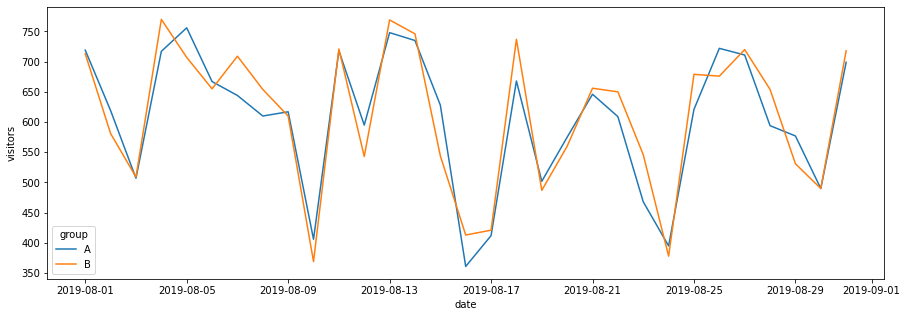

In [25]:


fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=data, x='date'  , y='visitors', hue="group")

plt.show()

In [26]:
# И удаляем этих пользователей из таблицы orders:
orders = orders.query('visitor_id not in @users_АВ')
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    0
dtype: int64

Посчитаем соотношение двух групп. 

In [27]:
visitors_count = visitors.groupby(['group']).sum().reset_index()
display(visitors_count)
visitors_AB = 1 - visitors_count['visitors'][0]/visitors_count['visitors'][1]
visitors_AB

,group,visitors
0,A,18736
1,B,18916


0.009515753859166809

  Для А/В - теста группы должны быть равными или +/- 1%. У нас разница между группами по наполненности меньше 1 процента. Значит тест проведен правильно.
    


### График кумулятивной выручки по группам. Сделайте выводы и предположения.

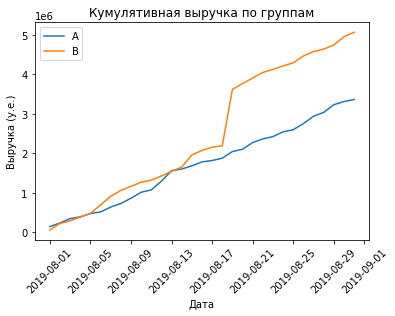

In [28]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
# получим агрегированные кумулятивные по дням данные о заказах интернет-магазина: 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.Постройте графики кумулятивной выручки по дням по группам
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка (у.е.)')
plt.show()


In [29]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Выручка в группе А почти равномерно увеличивается в течение всего теста. Однако в группе В есть заметный скачок, похожий на выброс.  Это говорит либо о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. В нашем случае это очень крупный заказ, который мы видели в предобработке.


###  График кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

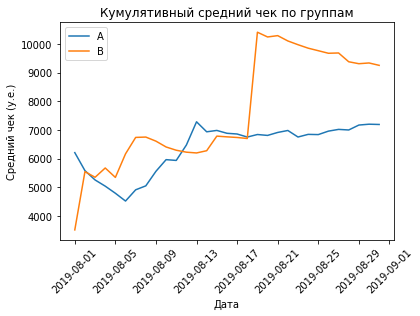

In [30]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек (у.е.)')
plt.show()

Средний чек  для группы А установился около значения 7000 у.е. Однако  в группе В показатель среднего чека еще продолжает снижаться после пика из-за крупного заказа.  

### График относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

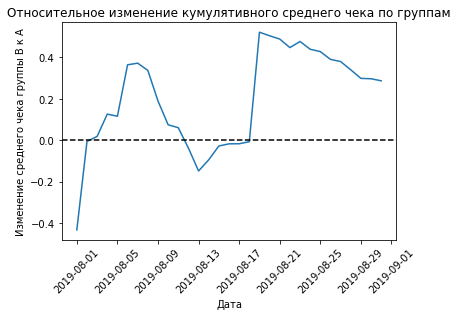

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека группы В к А')
plt.show()

В нескольких точках график имеет пики, связанные, скорее всего с крупными заказами пользователей группы В. После первого пика средний чек группы В снижался, пока не стал ниже среднего чека группы А. Потом опять произошел резкий скачок. Но на 31 августа график продолжает снижаться. Средний чек группы В падает после пика.

### График кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0.02, 0.04]:

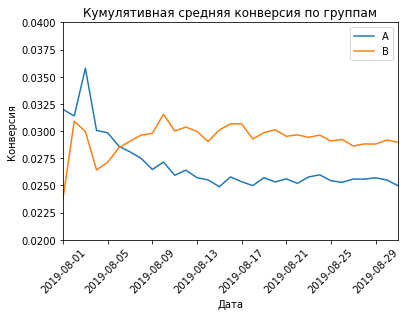

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])
plt.xticks(rotation=45)
plt.title('Кумулятивная средняя конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале теста конверсия была выше у группы А. Возможно был всплеск числа заказов. Однако в целом конверсия группы В выше, чем конверсия группы А. Также теперь мы понимаем, что пики прошлых графиков связаны с крупным заказом, а не резким увеличением числа заказов. Потому что на графике конверсии линии достаточно сглаженные в середине и конце периода теста.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

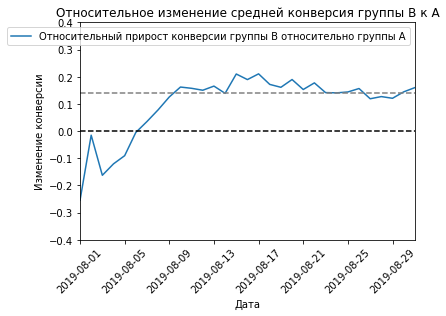

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])
plt.xticks(rotation=45)
plt.title('Относительное изменение средней конверсия группы В к А')
plt.xlabel('Дата')
plt.ylabel('Изменение конверсии')
plt.show()

В начале теста группа B проигрывала группе A, но потом её конверсия выросла. К концу теста конверсия составляет около 15 %.
Похоже, что конверсия установилось.

### Точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Подсчитаем количество заказов по пользователям и посмотрим на результат:

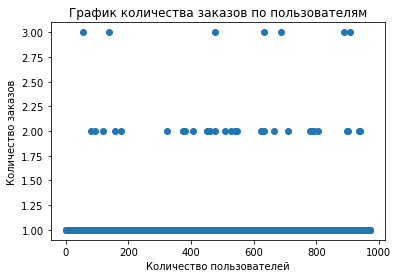

In [34]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

#  Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Почти все пользователи совершают одну покупку. Есть случаи, когда пользователь делал 2 заказа. И совсем единичные случаи 3 заказов.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [35]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. И не более 1% пользователей заказывали более 2 раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 
 

### Точечный график стоимостей заказов. Сделайте выводы и предположения.

In [36]:
orders.index.rename('index', inplace= True )
orders

,transaction_id,visitor_id,date,revenue,group
index,,,,,
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


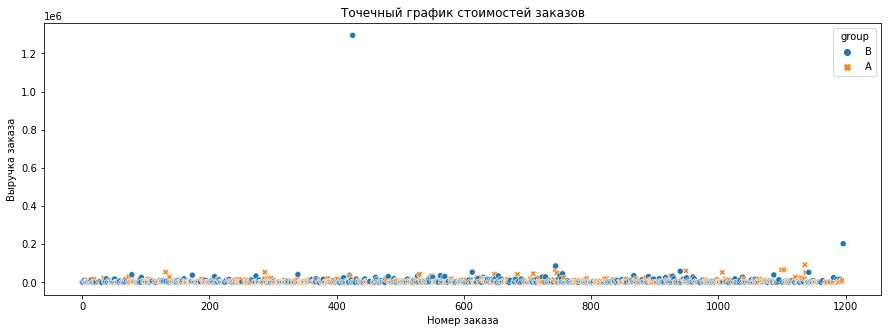

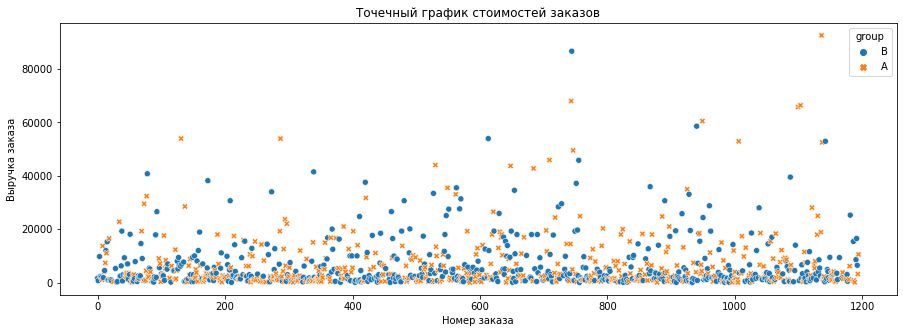

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=orders, x='index'  , y="revenue", hue="group", style="group")
ax.set (xlabel='Номер заказа',
ylabel='Выручка заказа',
title='Точечный график стоимостей заказов')
plt.show()
# Построим график без двух крупных выбросов
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=orders.query('revenue <200000 '), x='index'  , y="revenue", hue="group", style="group")
ax.set (xlabel='Номер заказа',
ylabel='Выручка заказа',
title='Точечный график стоимостей заказов')
plt.show()
 

Бывают заказы, которые дороже остальных, но на графике есть один очень дорогой заказ. На втором графике мы удалил два выброса, разные группы пометили разными цветами. Видно, что группы А и В визуально распределены одинаково по стоимости заказа пользователей.

### Расчет 95-й и 99-й перцентилей стоимости заказов. Выберите границу для определения аномальных заказов.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов дороже 26785 у.е. и не более 1% дороже 53904 у.е. Выберем заказы от 53904 у.е. за верхнюю границу суммы заказа, чтобы отсеять аномальных пользователей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Мы оценили результаты A/B-теста визуально, поняли, что в данных есть выбросы. Нашли границу для определения выбросов.
Теперь посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами А и В по «сырым» данным.  
Для начала подготовим данные, собрав в один датафрейм данные по визитам и заказам, добавив кумулятивные расчеты.

In [39]:
# visitorsADaily — количество пользователей в выбранную дату в группе A;
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# visitorsACummulative — количество пользователей до выбранной даты включительно в группе A;
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# visitorsBDaily — количество пользователей в выбранную дату в группе B;
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# visitorsBCummulative — количество пользователей до выбранной даты включительно в группе B;
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Новые столбцы:

- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'transaction_id']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [41]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



**Нулевая гипотеза**

Среднее количество заказов в группах равно.

**Альтернативная гипотеза** 

Среднее количество заказов в группах не равно.

In [42]:
display(f'p-value = {stats.mannwhitneyu(sampleA, sampleB)[1]}')
display(f'Относительное изменение конверсии группы В к группе А = {(sampleB.mean() / sampleA.mean() - 1):.3f}')


'p-value = 0.011018084110014696'

'Относительное изменение конверсии группы В к группе А = 0.160'

p-value = 0.011018084110014696, что меньше 0.05. Значит, отвергаем нулевая гипотезу о равенстве и принимаем альтернативную гипотезу о различии в среднем количестве заказов между группами.  
Конверсия в группе В выросла на 16,0 %.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза**

Различий в среднем чеке между группами нет. 

**Альтернативная гипотеза** 

Различия в среднем чеке между группами есть. 

In [43]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
average_check = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
display(f'p_value = {p_value}')
display(f'Относительное изменение среднего чека группы В к группе А = {(average_check):.3f}')


'p_value = 0.8294908998149533'

'Относительное изменение среднего чека группы В к группе А = 0.287'

p-value = 0.0.8294908998149533, что больше 0.05. Значит, принимаем нулевую гипотезу о равенстве средних чеков между группами, статистически значимых различий в реднем чеке между группами нет. 
 Однако в относительном значении средний чек в группе B вырос на 28.7%. 

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [44]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor', 'orders'] 

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
len(abnormalUsers)

16

Мы определили множество аномальных пользователей, их оказалось 16. Теперь очистим данные от них и посчитаем статистическую значимость различий между группами по среднему количеству заказов на посетителя и среднему чеку.

**Нулевая гипотеза**

Среднее количество заказов в группах равно.

**Альтернативная гипотеза** 

Среднее количество заказов в группах не равно.

In [45]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
ave_ord = sampleBFiltered.mean()/sampleAFiltered.mean()-1
display(f'p_value = {p_value}')
display(f'Относительное изменение конверсии группы В к группе А = {(ave_ord):.3f}')


'p_value = 0.007021302207652193'

'Относительное изменение конверсии группы В к группе А = 0.189'

p-value = 0.0.007021302207652193, что меньше 0.05. Значит, отвергаем нулевую гипотезу о равенстве и принимаем альтернативную гипотезу о различии в среднем количестве заказов между группами. По сырым данным вывод был такой же. 

Конверсия в группе В выросла на 18,9 %. По сырым данным на 16,0%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [46]:
orders

,transaction_id,visitor_id,date,revenue,group
index,,,,,
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [47]:
p_value =( 
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])

average_check = ( 
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1)


display(f'p_value = {p_value}')
display(f'Относительное изменение среднего чека группы В к группе А = {(average_check):.3f}')

'p_value = 0.7877044862440841'

'Относительное изменение среднего чека группы В к группе А = -0.032'

p-value = 0.0.7877044862440841, что больше 0.05. Значит, принимаем нулевую гипотезу о равенстве средних чеков между группами, статистически значимых различий в реднем чеке между группами нет. По сырым данным вывод был аналогичен. 
Однако в относительном значении средний чек в группе B снизился на 3,2%.  Как мы помним, 2 аномальных значения были как - раз в группе B, поэтому в сырых данных мы увидели увеличение среднего чека в группе В.  После очистки данных этот показатель снизился.

### Решение по результатам теста.  


Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Таким образом, нами были проанализированы результаты проведенного А-В теста. Можно говорить о том, что по сырым и по очищенным данным среднее количество заказов в группе В увеличилось по сравнению с группой А. То есть конверсия выросла. К тому же конверсия установилась судя по графикам изменения относительного и кумулятивного среднего количества заказов на посетителя группы B к группе A. По сырым данным конверсия в группе В выросла на на 16,0%., по очищенным на 18,9 %. 
Что касается среднего чека, то по очищенным и сырым данным можно сделать вывод о равенстве среднего чека между группами А и В.  По графикам показатель среднего чека группы В продолжает снижаться после пика, однако это связано с выбросами. 
Поэтому нами принято решение остановить тест и зафиксировать победу группы В над группой А. 
Конверсия увеличилась, а над показателем среднего чека нужно поработать.
